In [1]:
# IMPORTS
from __future__ import division
import numpy as np
import math
from numpy import random as npr
from matplotlib import pyplot as plt
from multiprocessing import Pool
import time

%matplotlib notebook
np.set_printoptions(precision=5)
npr.seed(1)

## Exercice 1

### 1) Generate n=500 samples from a Beta distribution with parameter (α,β)=(2,5). Display the histogram of this sample with 25 bins.

In [2]:
(a, b) = (2, 5)
n1 = 500

samples = npr.beta(a, b, n1)
plt.hist(samples, bins=25, label='Samples from Beta distribution')
plt.show()

<IPython.core.display.Javascript object>

### 2) Generate n=500 independent random vectors (Xi1, Xi2) dans R² where each coordinate is independent of the other and both having a Beta distribution with parameter (α,β)=(2,5). Compute the mean vector µˆ(in R²). In the next we apply some bootstrap techniques to estimate the variance and the bias of µˆ.


In [3]:
# Stick 2 beta distributions together
X = list(zip(npr.beta(a, b, n1), npr.beta(a, b, n1)))
print("X[:10] = ", "\n\t  ".join("({x_i1:.4}, {x_i2:.4})".format(x_i1=x_i1, x_i2=x_i2) for x_i1, x_i2 in X[:10]))

mu_chap = np.mean(X, axis=0)
print("mu_chap = ", mu_chap)

X[:10] =  (0.1017, 0.2402)
	  (0.3817, 0.1455)
	  (0.1452, 0.2323)
	  (0.1126, 0.05184)
	  (0.4579, 0.3351)
	  (0.2953, 0.1904)
	  (0.3499, 0.1302)
	  (0.235, 0.2451)
	  (0.1954, 0.4197)
	  (0.2179, 0.09383)
mu_chap =  [ 0.28147  0.28842]


### 3) Compute B=500 bootstrap estimators of the mean µ_chap_star_1, ..., µ_chap_star_B (µ_chap_star_b in R²). On the same plot, represent the observed data, the estimated mean µ_char and the 500 bootstrap estimators of the mean µ_chap_star_b. Note that since µ_chap is in R², the variance is a (2x2) matrix

In [4]:
B = 500

# Bootstrap estimators of the mean
mu_chap_stars = [np.mean([X[i] for i in npr.randint(0, n1, n1)], axis=0) for _ in range(B)]

# For an array of tuples, retrieve the i-th item of each pair as a list
def a_i(a,i):
    return [m[i] for m in a]

# Initialize plot
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the observed data
ax.scatter(a_i(X,0), a_i(X,1), c='b', marker='x', label='Observed data')

# Now, locate the estimated mean of the beta distributions
ax.scatter(mu_chap[0], mu_chap[1], c='g', marker='o', label='Estimated mean')

# Then plot the boostrap estimators of the mean
ax.scatter(a_i(mu_chap_stars,0), a_i(mu_chap_stars,1), c='r', marker='+', label='Bootstrap estimators')

# Finally, locate the estimated mean of the beta distributions
ax.scatter(mu_chap[0], mu_chap[1], c='g', marker='o', label='Estimated mean')

# There should be no negative values, so focus on the interesting part
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
plt.legend(loc='upper right')
plt.show()


<IPython.core.display.Javascript object>

### 4) Give bootstrap and jackknife estimates of the bias and the variance of the mean estimator mu_chap


In [5]:
print("Bootstrap:")
bs_bias = np.sum(mu_chap_stars - mu_chap, axis=0) / B
print('biais de l\'estimateur de la moyenne:', bs_bias)

mu_star_bar = np.mean(mu_chap_stars, axis=0)
bs_diff = np.subtract(mu_chap_stars, mu_star_bar)
bs_variance = bs_diff.T.dot(bs_diff) / B
print('covariance de l\'estimateur de la moyenne:', *bs_variance, '\n')


print("Jackknife:")
jk_samples = [X[:i] + X[i+1:] for i in range(len(X))]
jk_bias = np.sum(np.mean(jk_samples, axis=0) - mu_chap, axis=0) * (1 - 1/n1)
print('biais de l\'estimateur de la moyenne:', jk_bias)

mu_minus_i = [np.mean(jk_samples[i], axis=0) for i in range(n1)]
jk_diff = np.subtract(mu_minus_i, np.mean(mu_minus_i, axis=0))
jk_variance = jk_diff.T.dot(jk_diff) * (1 - 1/n1)
print('covariance de l\'estimateur de la moyenne:', *jk_variance, '\n')


aspt_diff1 = np.subtract(X, mu_chap)
var_n_X = aspt_diff1.T.dot(aspt_diff1) / (n1*(n1-1))
print('var(X)/n = ', *var_n_X, '\n')

Bootstrap:
biais de l'estimateur de la moyenne: [ -1.31832e-06  -3.61571e-05]
covariance de l'estimateur de la moyenne: [  5.78499e-05   1.94215e-06] [  1.94215e-06   5.26125e-05] 

Jackknife:
biais de l'estimateur de la moyenne: [  8.74491e-14   8.31002e-15]
covariance de l'estimateur de la moyenne: [  5.42022e-05   3.23499e-07] [  3.23499e-07   5.52020e-05] 

var(X)/n =  [  5.42022e-05   3.23499e-07] [  3.23499e-07   5.52020e-05] 



### 5) Give the true variance of the estimator of the mean.

In [6]:
def var_beta(a, b):
    return (a*b) / ((a+b+1) * (a+b)**2)

v_beta_2_5 = var_beta(2,5) * n1**-1
print("Variance d'une loi Beta de paramètres (a,b)=(2,5):", v_beta_2_5)
print("Cette valeur apparaît pour les termes diagonaux de la vraie variance. \
Les termes non-diagonaux sont nuls, car les distributions sont indépendantes.\n")
true_var = [[v_beta_2_5, 0], [0, v_beta_2_5]]

print("Distance bootstrap variance / true variance:")
dist_bs = np.subtract(bs_variance, true_var)
print(abs(dist_bs[0,0]) + abs(dist_bs[1,0]) + abs(dist_bs[1,1]), '\n')

print("Distance jackknife variance / true variance:")
dist_jk = np.subtract(jk_variance, true_var)
print(abs(dist_jk[0,0]) + abs(dist_jk[1,0]) + abs(dist_jk[1,1]))

Variance d'une loi Beta de paramètres (a,b)=(2,5): 5.102040816326531e-05
Cette valeur apparaît pour les termes diagonaux de la vraie variance. Les termes non-diagonaux sont nuls, car les distributions sont indépendantes.

Distance bootstrap variance / true variance:
1.03637083305e-05 

Distance jackknife variance / true variance:
7.68693758299e-06


## Exercice 2

### 6) Generate n=300 independent random vectors Xi with 2 dependent components satisfying Xi2=Xi1 + Ui where Xi1 ~ U[0,1] and Ui ~ U[-.1,.1] are independent (and U stands for uniform distribution).

In [7]:
n2 = 300

def generateX(n):
    return [(xi, xi + npr.uniform(-.1,.1)) for xi in npr.uniform(size=n)]

def t(X):
    return np.transpose(X)

X = generateX(n2)

### 7) Compute the true correlation coefficient c0 and an estimated correlation coefficient ĉ of Xi1 and Xi2.

In [8]:
c0 = 1.04**(-0.5)
print("Après calcul, la vraie corrélation vaut", c0)

def c_chap(X):
    return np.corrcoef(t(X))[1,0]

c_chapeau = c_chap(X)
print("La corrélation estimée vaut", c_chapeau)

Après calcul, la vraie corrélation vaut 0.9805806756909201
La corrélation estimée vaut 0.980327286512


### 8) Compute a 5% basic bootstrap confidence interval for the correlation coefficient, for B=500 bootstrap replicas

In [10]:
def bootstrap_corr(X, B):
    n = len(X)
    return [np.corrcoef(t([X[i] for i in npr.randint(0,n,n)]))[0,1] for _ in range(B)]

sqN = math.sqrt(len(X))
bs_corr = bootstrap_corr(X, B)
alpha = 5.0

def ic_basic_bootstrap(X, B, b_c, c_c):
    std_corr = np.subtract(b_c, c_c) * sqN
    ksi1 = np.percentile(std_corr, 100. - alpha/2)
    ksi2 = np.percentile(std_corr, alpha/2)
    return [c_c - ksi1 / sqN, c_c - ksi2 / sqN]

print(ic_basic_bootstrap(X, B, bs_corr, c_chapeau))

[0.97760642186672564, 0.98323149527676013]


### 9) Compute a 5% percentile bootstrap confidence interval for the correlation coefficient, for a number B=500 of bootstrap replicas.

In [11]:
def ic_percentile_bootstrap(X, B, b_c):
    q1 = np.percentile(b_c, alpha/2)
    q2 = np.percentile(b_c, 100 - alpha/2)
    return [q1,q2]

ic_pb = ic_percentile_bootstrap(X, B, bs_corr)
ic_pb

[0.97742307774738502, 0.9830481511574195]

### 10) Compute a 5% asymptotic confidence interval for the correlation coefficient.

In [13]:
# Calculate jk_var, variance of sqrt(n)*(bs_corr - c0), using the jackknife technique
def ic_asymptotic(X, b_c, c_c):
    sqN = math.sqrt(len(X))
    std_corr = list(np.subtract(b_c, c_c) * sqN)
    jk_var = np.mean([math.sqrt(np.var(std_corr[:i] + std_corr[i+1:])) for i in range(n2)])

    ksi = 1.96
    return [c_c - jk_var * ksi / sqN, c_c + jk_var * ksi / sqN]

ic_asymp = ic_asymptotic(X, bs_corr, c_chapeau)
ic_asymp

[0.97751741983637896, 0.98313715318776618]

### 11) By means of simulation (use for instance M=2000 repetitions of the experiment with a Monte-Carlo approach), evaluate the coverage probability associated to each method: basic (in question 8), percentile (in question 9) and asymptotic-jackknife (in question 10). If I is a confidence interval that has been computed using one of the previous technique, the coverage probability associated to I is : P(c0 in I)

In [20]:
def is_in_ic_bb(X, B, bs_c, c_c):
    ic_bb = ic_basic_bootstrap(X, B, bs_c, c_c)
    return 1 if ic_bb[0] < c0 < ic_bb[1] else 0

def is_in_ic_pb(X, B, bs_c):
    ic_pb = ic_percentile_bootstrap(X, B, bs_c)
    return 1 if ic_pb[0] < c0 < ic_pb[1] else 0

def is_in_ic_a(X, bs_c, c_c):
    ic_a = ic_asymptotic(X, bs_c, c_c)
    return 1 if ic_a[0] < c0 < ic_a[1] else 0

def are_in_ic(n):
    X = generateX(n)
    c_c = c_chap(X)
    b_c = bootstrap_corr(X,B)
    return [is_in_ic_bb(X, B, b_c, c_c), is_in_ic_pb(X, B, b_c), is_in_ic_a(X, b_c, c_c)]

def estimate_coverage(n, M, mute=True):
    start = time.time()
    
    with Pool() as pool:
        res = 100 * np.sum(pool.map(are_in_ic, (n,)*M), axis=0) / M
    
    if not mute:
        print("Ellapsed time:", int(time.time() - start), 's')
        print("Coverage probability for basic bootstrap:", res[0], '%')
        print("Coverage probability for percentile bootstrap:", res[1], '%')
        print("Coverage probability for asymptotic:", res[2], '%\n')
        
    return res

    
M = 50
estimate_coverage(n2, M, False)

Ellapsed time: 7 s
Coverage probability for basic bootstrap: 94.0 %
Coverage probability for percentile bootstrap: 94.0 %
Coverage probability for asymptotic: 94.0 %



array([ 94.,  94.,  94.])

### 12) Draw the evaluated coverage probabilities for different sample sizes n=30, 50, 100, 300.

In [27]:
res30 = estimate_coverage(30, M)
res50 = estimate_coverage(50, M)
res100 = estimate_coverage(100, M)
res300 = estimate_coverage(300, M)

Ellapsed time: 4 s
Coverage probability for basic bootstrap: 80.0 %
Coverage probability for percentile bootstrap: 88.0 %
Coverage probability for asymptotic: 88.0 %

Ellapsed time: 4 s
Coverage probability for basic bootstrap: 86.0 %
Coverage probability for percentile bootstrap: 88.0 %
Coverage probability for asymptotic: 88.0 %

Ellapsed time: 5 s
Coverage probability for basic bootstrap: 86.0 %
Coverage probability for percentile bootstrap: 86.0 %
Coverage probability for asymptotic: 88.0 %

Ellapsed time: 8 s
Coverage probability for basic bootstrap: 94.0 %
Coverage probability for percentile bootstrap: 94.0 %
Coverage probability for asymptotic: 94.0 %



<IPython.core.display.Javascript object>


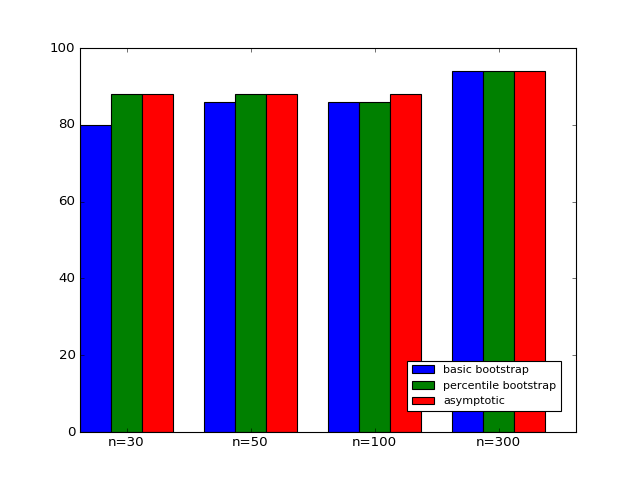

In [50]:
res = [*res30, 0, *res50, 0, *res100, 0, *res300]

fig, ax = plt.subplots()

width = 1
blue = [0,4,8,12]
ax.bar(blue, [res[i] for i in blue], 1, color='blue', label='basic bootstrap')
green = [1,5,9,13]
ax.bar(green, [res[i] for i in green], 1, color='green', label='percentile bootstrap')
red = [2,6,10,14]
ax.bar(red, [res[i] for i in red], 1, color='red', label='asymptotic')

ax.set_xticks([1.5, 5.5, 9.5, 13.5])
ax.set_xticklabels(['n=30','n=50','n=100','n=300'])
ax.set_ylim(ymax=100)
plt.legend(bbox_to_anchor=(.98, 0.2), prop={'size':10})

plt.show()